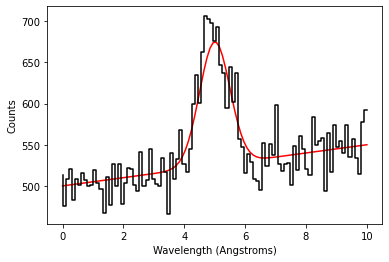

In [9]:
from matplotlib.pyplot import plot, step, xlabel, ylabel, show, subplots
from numpy import *  # mmmmmm  crunchy
# Start by defining some parameters. Change these if you like!
cont_zp = 500.0
cont_slope = 5.0
amplitude = 150.0
width = 0.5
center = 5.0

# Next, a grid of wavelenght channels (assumed to have no uncertainty)
wave = linspace(0,10,100)
# The 'true' observations
flux = amplitude*exp(-0.5*power(wave-center,2)/width**2)+ \
        cont_zp + cont_slope*wave
# The actual observations = true observations + Poisson noise
obs_flux = random.poisson(flux)

%matplotlib inline
plot(wave, flux, 'r-')
step(wave, obs_flux, color='k')
xlabel('Wavelength (Angstroms)')
ylabel('Counts')
show()


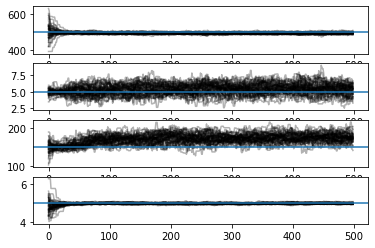

In [26]:
import emcee
from scipy.stats import norm

def model(x, cont, slope, amp, center, width):
    model = amp*exp(-0.5*power(x-center, 2)/width**2) + cont + \
        slope*x
    return model

def lnprior(p):
    cont, slope, amp, center, width = p
    if width <= 0 or slope < 0:
        # ln(0)
        return -inf
    return 0

def lnlike(p, wave, flux):
    cont, slope, amp, center, width = p
    m = model(wave, *p)
    return sum(norm.logpdf(flux, loc=m, scale=sqrt(flux)))


def lnprob(p, wave, flux):
    # priors
    lp = lnprior(p)
    if not isfinite(lp):
        return -inf
    return lp + lnlike(p, wave, flux)


Nwalker, Ndim = 50, 5
ptrue = array([500., 5.0, 150., 5.0, 0.5])
# add a random vector 0.1 times the true vector to the true vector
p0 = [ptrue + 0.1*random.randn(Ndim)*ptrue for i in range(Nwalker)]

sampler = emcee.EnsembleSampler(Nwalker, Ndim, lnprob, args=(wave, obs_flux))
pos, prob,state = sampler.run_mcmc(p0, 500)

fig, ax = subplots(4, 1)
res = [ax[i].plot(sampler.chain[:, :, i].T, '-', color='k', alpha=0.3)
       for i in range(4)]
res = [ax[i].axhline(ptrue[i]) for i in range(4)]


In [23]:
import emcee
from scipy.stats import norm
import scipy.stats as st
import numpy as np

# def model(x, cont, slope, amp, center, width):
#     model = amp*exp(-0.5*power(x-center, 2)/width**2) + cont + \
#         slope*x
#     return model

values = linspace(0, 10, 100)

def lnprior(p):
    cont, slope, amp, center, width = p
    if mu <= 1:
        # ln(0)
        return -inf
    return 0

def lnlike(p, data):
    mu = p
    return sum(st.poisson.logpmf(data,mu))

def lnprob(p, data):
    # priors
    lp = lnprior(p)
    if not isfinite(lp):
        return -inf
    return lp + lnlike(p, data)


Nwalker, Ndim = 50, 1
ptrue = array([500., 5.0, 150., 5.0, 0.5])
# add a random vector 0.1 times the true vector to the true vector
# p0 = [ptrue + 0.1*random.randn(Ndim)*ptrue for i in range(Nwalker)]
p0 = np.random.rand(Nwalker, Ndim)  # random starting guess

sampler = emcee.EnsembleSampler(Nwalker, Ndim, lnprob, args=(values))
pos, prob,state = sampler.run_mcmc(p0, 500)

fig, ax = subplots(4, 1)
res = [ax[i].plot(sampler.chain[:, :, i].T, '-', color='k', alpha=0.3)
       for i in range(4)]
res = [ax[i].axhline(ptrue[i]) for i in range(4)]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [22]:
lnprob(7,wave)

TypeError: lnprob() takes 2 positional arguments but 3 were given